<a href="https://colab.research.google.com/github/Foxirium/Proyecto_Final_-DS_II_-Gambin-/blob/main/Proyecto_Final_DSII_%2B%22Gambin%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Video Games Dataset
---
Dataset que contiene una lista de video juegos. Cada uno de los mismos estan caracterizados por un genero, un año de lanzamiento, publisher(editor), plataforma, asi tambien como las ventas que representaron esos juegos en correspondientes regiones (NA, EU, JP, otros) y también encontraremos las valoraciones promedio de los criticos y de los usuarios.

---
##Descripción columnas del dataset:

**[Name]**: Nombre del juego.

**[Year]**: Año en el que fue lanzado.

**[Genre]**: Genero oficial del juego.

**[Publisher]**: Editora del juego.

**[Platform]**: Plataforma para la que el juego fue lanzado

**[NA_Sales]**: Ventas en Norte America por millon.

**[EU_Sales]**: Ventas en la Unión Europea por millon.

**[JP_Sales]**: Ventas en Japón por millon.

**[Other_Sales]**: Ventas del resto del mundo por millon.

**[Global_Sales]**: Ventas totales por millón (Suma [NA_Sales], [EU_Sales], [JP_Sales], [Other_Sales]).

**[Critic_Score]**: Promedio de los puntajes del juego recibido por los criticos.

**[Cricitc_Count]**: Cantidad de criticos que realizaron una valoración.

**[User_Score]**: Promedio de los puntajes del juego recibido por los usuarios.

**[User_Count]**: Cantidad de usuarios que realiazron una valoración.

**[Developer]**: Entidad que desarrollo el juego.

**[Rating]**: Clasificación del juego (E, Everyone, T-Teens, etc).


---


#Columnas interesantes para análisis:

*[NA_Sales], +[EU_Sales], +[JP_Sales], +[Other_Sales]* *=[Global_Sales]. Las columnas de ventas pueden sernos de mucha utilidad, por ejemplo, al cruzarla con el género o los años, podriamos obtener insights sobre como evolucionaron las ventas de las distintas regiones por año, como evoluciono la cantidad de generos por año.

*[Platform]*. Si sumamos esta columna a las ventas podriamos determinar que plataformas fueron las mas rentables por región y tambien cuandos juegos han salido por plataforma por año y la diferencía, si es que la hay, de los generos mas vendidos entre las plataformas.

*[Developer]*. Puede ayudarnos a recolectar insights sobre la relación entre los desarrolladores y las ventas globales ¿Cuales son los desarrolladores que mas ventas globales lograron?

---

# Abstract:


En un mercado tan competitivo como el de los videojuegos, comprender las tendencias de ventas y los factores que influyen en ellas es crucial para el éxito empresarial. Un modelo predictivo preciso puede proporcionar a los desarrolladores y editores una ventaja al permitirles anticipar la demanda y ajustar estrategias de lanzamiento, marketing y desarrollo de productos de manera más efectiva.

El análisis de datos en esta industria puede revelar patrones y comportamientos del consumidor que pueden ser difíciles de detectar de otra manera. Al comprender mejor las preferencias de los jugadores y cómo estas se relacionan con las características de los juegos, las empresas pueden tomar decisiones más informadas sobre qué tipos de juegos desarrollar y cómo dirigirse a diferentes segmentos de mercado.

La aplicación de técnicas de aprendizaje automático en este contexto puede proporcionar valiosos conocimientos sobre la relación entre variables, permitiendo a las empresas optimizar sus procesos de toma de decisiones y maximizar su retorno de inversión en el desarrollo y comercialización de videojuegos.

Este proyecto puede ayudar a identificar oportunidades de inversión y crecimiento dentro de la industria de los videojuegos. Al analizar qué características y géneros de juegos tienden a tener un mejor desempeño en términos de ventas globales, los inversores pueden tomar decisiones más fundamentadas sobre dónde asignar recursos y capital. Como audiencia primaria podriamos señalar a estos accionistas y directorio de la empresa con la que estamos trabajando.


Como objetivo buscamos predecir las ventas globales por millon utilizando un algoritmo de regresión, teniendo en cuenta los puntos ya establecidos como afirmaciones que guían nuestra investigación.

---------

Importación de las librerias que seran utilizadas a lo largo del trabajo

In [1]:
import pandas as pd
import numpy as np

#GRÁFICOS
import seaborn as sns
import matplotlib.pyplot as plt

#TRANSFORMACIÓN / ESCALADO DATOS
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#MODELOS
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from xgboost import XGBRegressor

#ENTRENAMIENTO
from sklearn.model_selection import train_test_split

#METRICAS PREDICCIÓN
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#MEJORA MODELOS
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.decomposition import PCA

Importación de dataset desde una url con el archivo alojado en github

In [2]:
url_data_set = "https://raw.githubusercontent.com/Foxirium/DataSets/main/Video_Games.csv"

df_games = pd.read_csv(url_data_set)



df_games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


# 1) 1.A Exploración y limpieza



In [3]:
#Utilizo el metodo head para ver los primeros 5 registros
df_games.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Metodo info para tener el tipo de dato y la cantidad de valores no nulos
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
#Sumo la cantidad de valores nulos por columna
df_null_values = df_games.isnull().sum()

df_null_values

,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [6]:
#Porcentaje de valores nulos por columna (Sumo los valores y los divido por el largo del dataframe * 100)
percentage_null = round(df_games.isnull().sum() / len(df_games)*100,2)

percentage_null

,0
Name,0.01
Platform,0.00
Year_of_Release,1.61
Genre,0.01
Publisher,0.32
NA_Sales,0.00
EU_Sales,0.00
JP_Sales,0.00
Other_Sales,0.00
Global_Sales,0.00


## 1) 1.b Imputación de valores *NaN* con sklearn

Considerando que la idea es predecír las ventas globales existen columnas como "Year_of_Release", "Genre" y las distitantes de "Sales", para poder hacer una exploración y buscar patrones atraves de dichas columnas.

Las columnas **[Critic_Score], [Critic_Count], [User_Count], [Rating], [Developer]** tienen mas de un 35% de valores nulos. Estas columnas pueden asistirnos para la predicción que estamos buscando, por ende, optamos por inputar los valores nulos utilizando distintos metodos proporcionados por la libreria sklearn

La columna **[User_Score]** tiene una situación un poco mas particular. La misma columna se encuentra como tipo objeto ya que cuenta con un valor que es 'tbd' (to be determined, "ha ser determinado") para recuperar esos valores vamos a realizar 3 acciones

  - Reemplazar los valores 'tbd' por 0 utilizando un bucle for y el metodo .replace

  - Cambiar el tipo de dato de la columna a float

  - Por ultimo ultilizar Skelearn para imputar los valores por la mediana ya que la media es mas sensible a los valores extremos y el reemplazo por 0 afectaria dicha media

La columna "Year_of_Release" que podria darnos insights sobre como se comportaron las ventas y los generos a lo largo del tiempo,prensenta un problema al detectar que, además de los valores *NaN*, la misma contiene valores flotantes. Vamos a imputar la poca cantidad de valores *NaN* utilizando la media y convertir el tipo de dato en entero (int)

Lo mismo haremos con la columnas **[Critic_Count], [Critic_Score], [User_Count], [User_Count]**

Las columnas **[Publisher], [Rating], [Developer]**, los valores *NaN* serán reemplazados por un valor "Otro", entendiendo que el mismo no podemos asumirlo o aproximarlo con los metodos utilizados en las columnas númericas anteriores


-----

Imputacion valores columnas ['Critic_Count'], ['Critic_Score'], ['User_Count'], ['Year_of_Release']

In [7]:
#Instanciamos la estrategia de nuestro imputador en una variable llamada "imputer" (esta misma es para las columnas con variables númericas)

imputer_mean = SimpleImputer(missing_values=np.nan,strategy='mean')

#Hacemos reshape a cada una de las columnas a las que vamos a pasar por esta estrategia
Critic_Count = df_games['Critic_Count'].values.reshape(-1,1)
Critic_Score = df_games['Critic_Score'].values.reshape(-1,1)

User_Count = df_games['User_Count'].values.reshape(-1,1)

Year_of_Release = df_games['Year_of_Release'].values.reshape(-1,1)

#Asignamos en un variable los valores de la columna imputada
Critic_Count_imputed = imputer_mean.fit_transform(Critic_Count)
Critic_Score_imputed = imputer_mean.fit_transform(Critic_Score)

User_Count_imputed = imputer_mean.fit_transform(User_Count)

Year_of_Release_imputed = imputer_mean.fit_transform(Year_of_Release)


In [8]:
#Asigno cada columna imputada con su columna correspondiente

df_games['Critic_Count'] = Critic_Count_imputed
df_games['Critic_Score'] = Critic_Score_imputed
df_games['User_Count'] = User_Count_imputed
df_games['Year_of_Release'] = Year_of_Release_imputed



In [9]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,NaN,162.229908,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.3,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,NaN,162.229908,NaN,NaN


In [10]:
#Transformo los años que estaban como tipo de dato "Float" a entero (int)
df_games["Year_of_Release"] = df_games["Year_of_Release"].astype(int)

df_games.isnull().sum()

,0
Name,2
Platform,0
Year_of_Release,0
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


Transformación columna ['User Score]

In [11]:
#Busco los valores de la columna user score

user_score_valores = df_games['User_Score'].values

user_score_valores_reemplazados = [] #Nueva lista para los valores reemplazados

for valor in user_score_valores:
  if valor == 'tbd': #Si el valor es tbd
    nuevo_valor = valor.replace('tbd','0') #Reemplazalo por '0'
    user_score_valores_reemplazados.append(nuevo_valor) #Apendealo a la nueva lista
  else:
    user_score_valores_reemplazados.append(valor)  #Si no, apendea el valor original

df_games['User_Score'] = user_score_valores_reemplazados

df_games["User_Score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '0', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [12]:
df_games['User_Score'].value_counts()

,count
User_Score,
0,2426
7.8,324
8,290
8.2,282
8.3,254
...,...
1.5,2
1.1,2
1.9,2


Al hacer esta transformación y efectivamente cambiar el valor 'tbd' por '0', vemos que hay una gran cantidad de valores en '0', reemplazar por la media los valores nan podria afectar negativamente ya que la misma es sensible a los valores extremos. Por ello optamos por reemplzar los valores 'NaN' por la mediana

In [13]:
#Instanciamos la estrategia de nuestro imputador en una variable llamada "imputer" (esta misma es para las columnas con variables númericas)

imputer_median = SimpleImputer(missing_values=np.nan,strategy='median')

#Hacemos reshape a cada una de las columnas a las que vamos a pasar por esta estrategia
User_Score = df_games['User_Score'].values.reshape(-1,1)

#Asignamos en un variable los valores de la columna imputada
User_Score_imputed = imputer_median.fit_transform(User_Score)


df_games['User_Score'] = User_Score_imputed


In [14]:
#Imputación manual de las variables categoricas

df_games["Rating"].fillna("Otro", inplace=True)
df_games["Developer"].fillna("Otro", inplace=True)
df_games["Publisher"].fillna("Otro", inplace=True)
df_games["Genre"].fillna("Misc", inplace=True)
df_games["Name"].fillna("Otro", inplace=True)

In [15]:
pd.DataFrame(df_games.isnull().sum())

,0
Name,0
Platform,0
Year_of_Release,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [16]:
#Vuelvo a mostrar el data frame para ver si se reemplazaron los valores nulos
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16719 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16719 non-null  int64  
 3   Genre            16719 non-null  object 
 4   Publisher        16719 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     16719 non-null  float64
 11  Critic_Count     16719 non-null  float64
 12  User_Score       16719 non-null  float64
 13  User_Count       16719 non-null  float64
 14  Developer        16719 non-null  object 
 15  Rating           16719 non-null  object 
dtypes: float64(9), int64(1), object(6)
memory usage: 2.0+ MB


#2) EDA (Exploratory Data Analysis)
#Gráficos y observaciones
Como primera observación quisera ver como se distribuyen mis videojuegos según su fecha de lanzamiento. Creo una variable que va a ser mi histograma, donde le voy a pasar mi df, en el eje x quiero los años de lanzamiento y muestre el conteo por año

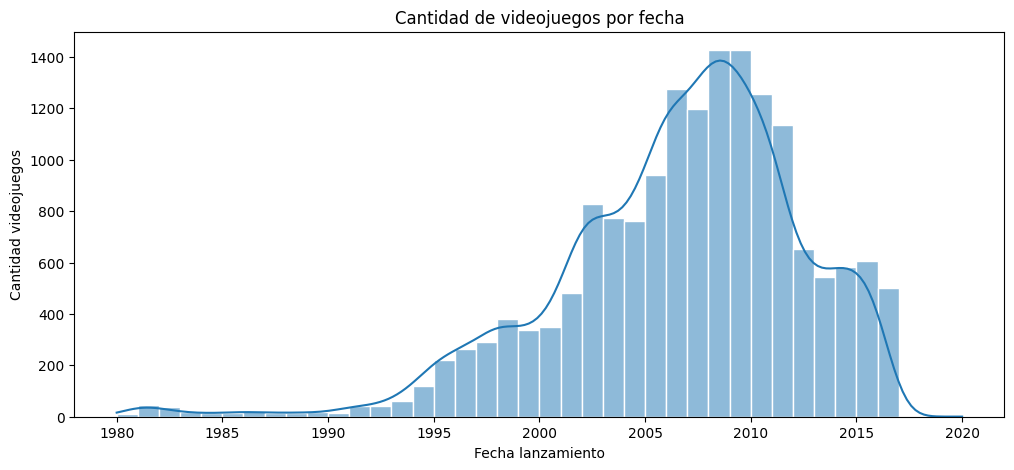

In [17]:
fig, ax = plt.subplots(figsize=(12,5))
frecuencia_años = sns.histplot(data=df_games, x="Year_of_Release", binwidth = 1, edgecolor = "white", linewidth = 1, kde="True")
frecuencia_años.set(xlabel="Fecha lanzamiento", ylabel="Cantidad videojuegos" ,title="Cantidad de videojuegos por fecha")
plt.show()

Podemos observar una distribución asimetrica positiva y podriamos decir en base a este gráfico que la mayoria de mis videojuegos aparecen entre el 2005 y el 2012 aproximadamente

-------

***Podriamos evaluar como se comportaron los distintos generos por año***.

*Creamos un plot donde graficaremos. Estipulamos el tamaño y creamos un gráfico para determinar la frecuencia
Pasaremos el "año de lanzamiento" al eje x, el conteo sera el eje y, y dividiremos los graficos por la columna "genre".
La misma al tener 12 géneros nos mostrara 12 gráficos distintos. Pasamos col_wrap para que solo muestre 4 gráficos por columna
y algunos aspectos mas de formato*


<Figure size 1000x1000 with 0 Axes>

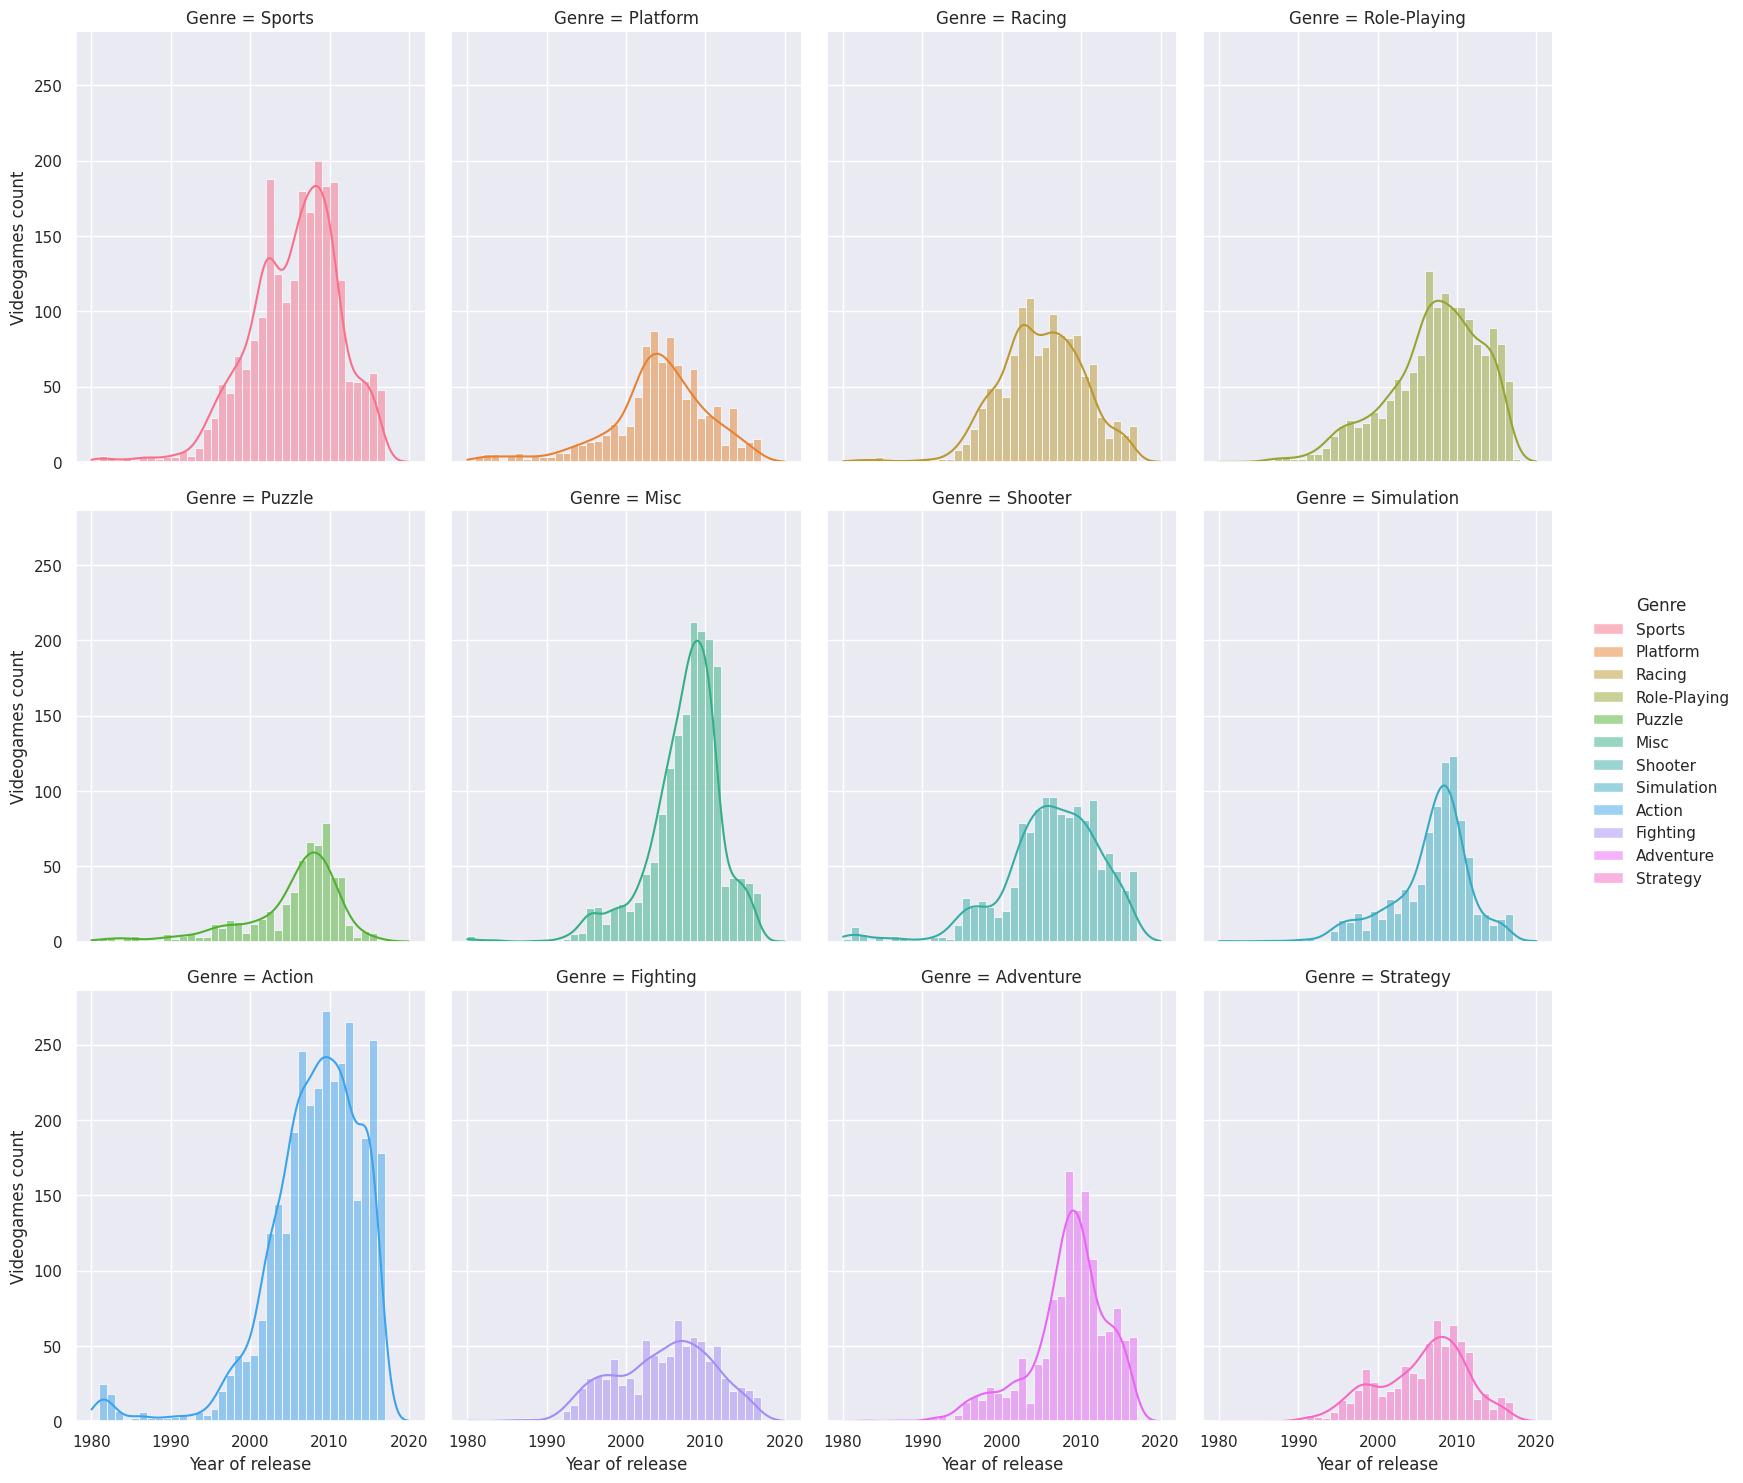

In [18]:
plt.figure(figsize=(10, 10))
#Tamaño de cada uno de los gráficos
sns.set(rc={'figure.figsize': (15, 10)})
displot_for_genre= sns.displot(data=df_games, x="Year_of_Release", hue="Genre", col="Genre", col_wrap=4, edgecolor = "white",binwidth = 1, aspect=.8, kde="True")
# Itera a través de cada gráfico y establece etiquetas para los ejes
for ax in displot_for_genre.axes:
  ax.set_ylabel("Videogames count")
  ax.set_xlabel("Year of release")
plt.show()

**Observaciones generales:**

*Cada uno de los géneros parecen estar comportandose bastante parecido donde alcanzan un pico entre los años 2005 y 2012. Y además parecen presentar similitudes en su distribución, marcando una clara asimetria positiva.*

---

***Quisiera ver como se distribuyen mis videojuegos por generos ¿Cuantos videojuegos tengo por genero?***

*Creo una variable que va a almacenar en el indice los generos y en una columna el conteo total de ese genero*

In [19]:
#Conteo de la cantidad de veces que aparece cada género
genre_count = df_games["Genre"].value_counts()

pd.DataFrame(genre_count)

,count
Genre,
Action,3370
Sports,2348
Misc,1752
Role-Playing,1500
Shooter,1323
Adventure,1303
Racing,1249
Platform,888
Simulation,874


***Con esta información creamos un grafico de barras para visualizar de mejor manera la cantidad de videojuegos según el genero***.

*Creamos un plot donde se graficara. Con seaborn creamos el gráfico de barras, pasamos los generos como eje x y el conteo de
los mismos como eje y. Agregamos una distinción de color por cada género para hacer mas amena la lectura*

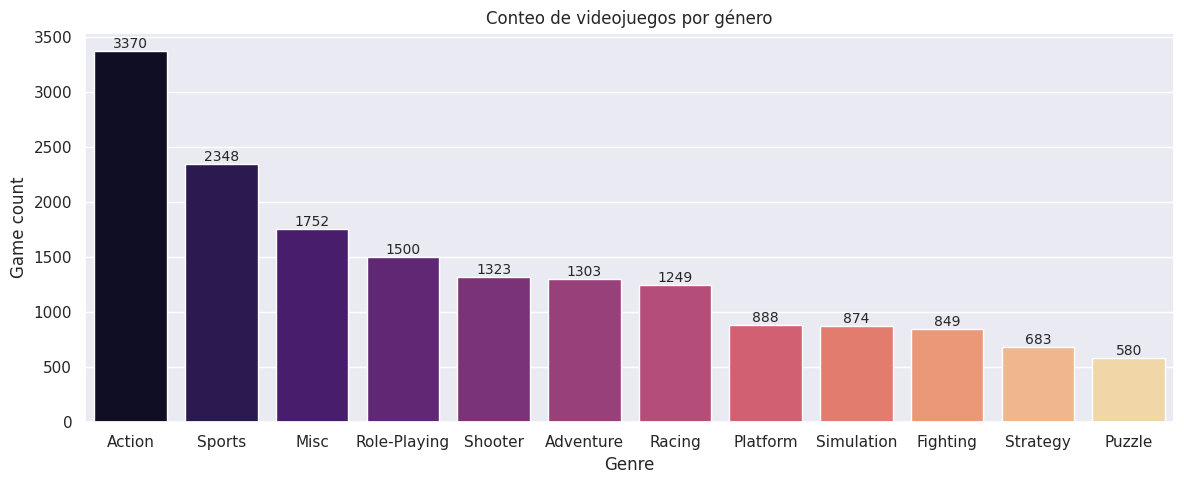

In [20]:
#Como la columna género y videojuegos coinciden en su cantidad de datos puedo asumir que según la cantidad de veces que aparece un género es la cantidad de videojuegos que tengo del mismo
plt.figure(figsize=(12,5))
barplot_genre = sns.barplot(x=genre_count.index, y=genre_count, hue=genre_count.index, palette="magma")
barplot_genre.set(xlabel="Genre", ylabel="Game count", title="Conteo de videojuegos por género")

for container in barplot_genre.containers: #Para cada columna, en el grafico
    barplot_genre.bar_label(container, fontsize=10) #Ingreso el valor y el tamaño de la fuente

plt.tight_layout()
plt.show()

*Se puede observar una predominancia de videojuegos del genero de "acción" dentro de este dataset, seguido de "deportes" y "variados"*

----

*Puedo utilizar la función len para con el largo del la columna relizar un porcentaje de aparación de cada género*

In [21]:
#Porcentaje de géneros por aparación en mi dataset
percentage_genre = df_games["Genre"].value_counts() / len(df_games[["Genre"]])*100

percentage_genre

,count
Genre,
Action,20.156708
Sports,14.043902
Misc,10.479096
Role-Playing,8.971828
Shooter,7.913153
Adventure,7.793528
Racing,7.470542
Platform,5.311322
Simulation,5.227585


In [22]:
#Guardo en una variable top 5 los valores de forma descendente para mostrarlos en un grafico de tortas
Top_5_percentage_genre = percentage_genre.sort_values(ascending=False).head()

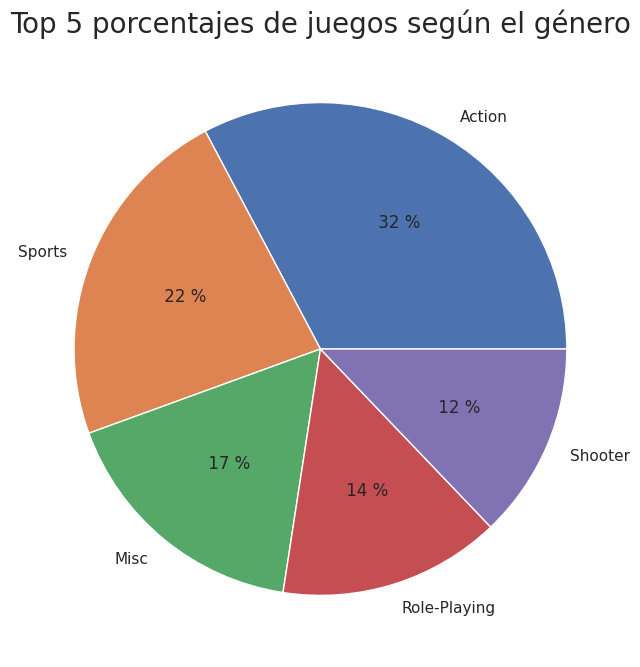

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
plt.pie(Top_5_percentage_genre, labels =Top_5_percentage_genre.index, autopct="% 0i %%")
ax.set_title('Top 5 porcentajes de juegos según el género', fontsize=20)
plt.show()

*Podemos observar como en el top 5 de juegos por genero encontramos a los de Acción que engloban el 32% de nuestro dataset seguido de los de género Deporte con un 22% y Variados en un 17% respectivamente*

---

*Quiero entender cuantas fueron las ventas globales por género y ver cuales han generado el mayor número de ventas*


In [24]:
#Utilizo el metodo groupby para agrupar las ventas totales por género
genre_global_sales = df_games.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)

genre_global_sales

,Global_Sales
Genre,
Action,1745.27
Sports,1332.00
Shooter,1052.94
Role-Playing,934.40
Platform,828.08
Misc,805.60
Racing,728.90
Fighting,447.48
Simulation,390.42


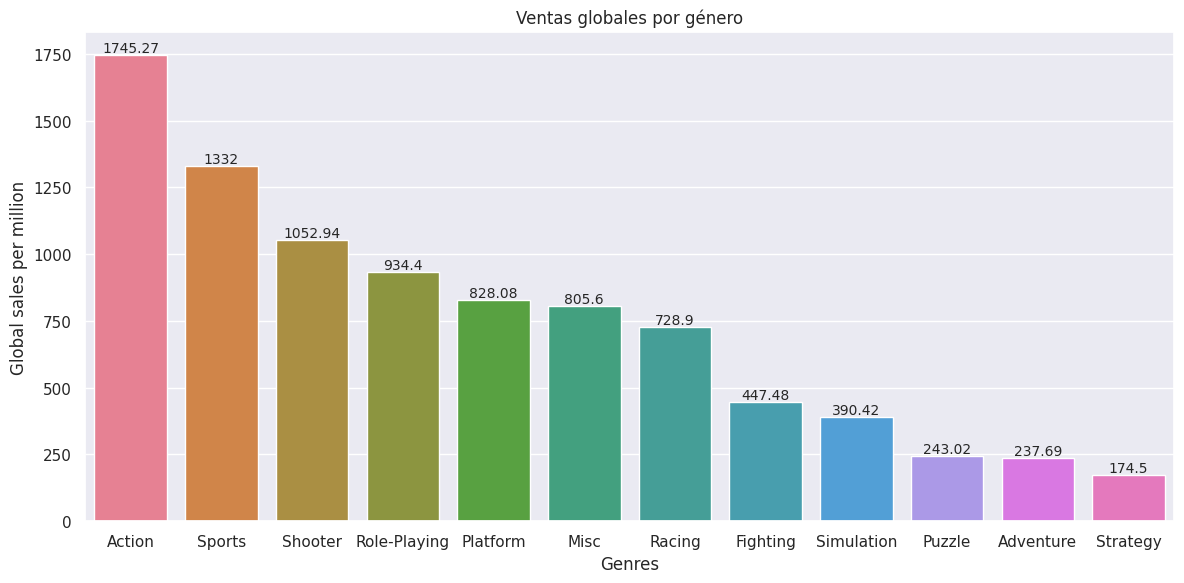

In [25]:
plt.figure(figsize=(12,6))
barplot_global_sales = sns.barplot(x=genre_global_sales.index, y=genre_global_sales, hue=genre_global_sales.index)
barplot_global_sales.set(xlabel= "Genres", ylabel="Global sales per million", title="Ventas globales por género")
for container in barplot_global_sales.containers:
  barplot_global_sales.bar_label(container, fontsize=10)

plt.tight_layout()
plt.show()

*Rapidamente podemos identificar como los géneros de acción, deportes, disparos y de rol son los que mas ventas globales han tenido*

---

***¿Cómo se comporto el porcentaje de las ventas por región?***.

*Agrupamos las ventas de cada región por año utilizando el método .groupby*

In [26]:
sum_sales_region = df_games.groupby("Year_of_Release")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
sum_sales_region

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year_of_Release,,,,
1980,10.59,0.67,0.00,0.12
1981,33.40,1.96,0.00,0.32
1982,26.92,1.65,0.00,0.31
1983,7.76,0.80,8.10,0.14
1984,33.28,2.10,14.27,0.70
1985,33.73,4.74,14.56,0.92
1986,12.50,2.84,19.81,1.93
1987,8.46,1.41,11.63,0.20
1988,23.87,6.59,15.76,0.99


*Creamos una variable que va a sumar la cantidad de ventas, que se llamara "total_sales"
y luego creamos el gráfico de torta. Pasaremos las ventas totales y que los cortes sean las columnas de mi agrupamiento anterior,
en este caso las regiones*

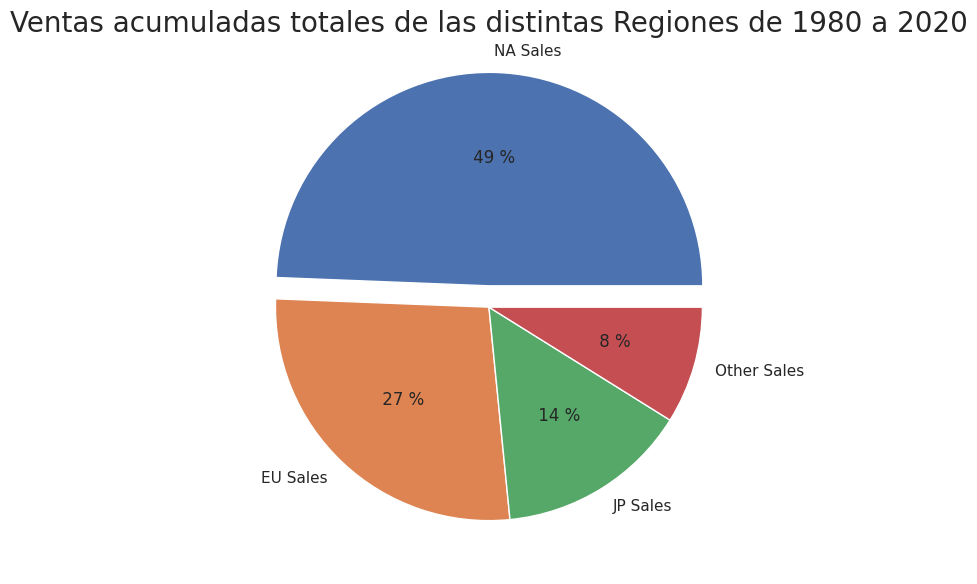

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
total_sales = sum_sales_region.sum()
plt.grid(True, axis='y')
# Cambiar nombres de los labels
labels = ["NA Sales", "EU Sales", "JP Sales", "Other Sales"]
plt.pie(total_sales, labels=labels, explode=(0.1,0,0,0), autopct="% 0i %%")
ax.set_title('Ventas acumuladas totales de las distintas Regiones de 1980 a 2020', fontsize=20)

ax.set_label(labels)
plt.tight_layout()

plt.show()

*Podemos observar que el 49% de las ventas corresponden a la región de Norte America seguido de la Union Europea*.

---

***¿Cómo han evolucionado las ventas de las distintas regiones por año?***

*Antes analizamos el porcentaje total de ventas ¿Que región obtuvo la mayor cantidad de ventas?
Ahora nos puede interesar como se han movido las ventas por región a lo largo de los años*

*Establecemos nuestra figura, y un grid para formato. Creamos 4 lineas donde pasamos los años de lanzamiento en el eje x y cada una de suma de las ventas de las regiones en el eje y, aplicamos una etiqueta para cada linea. Sumamos a esto un titulo y una etiqueta para cada eje*

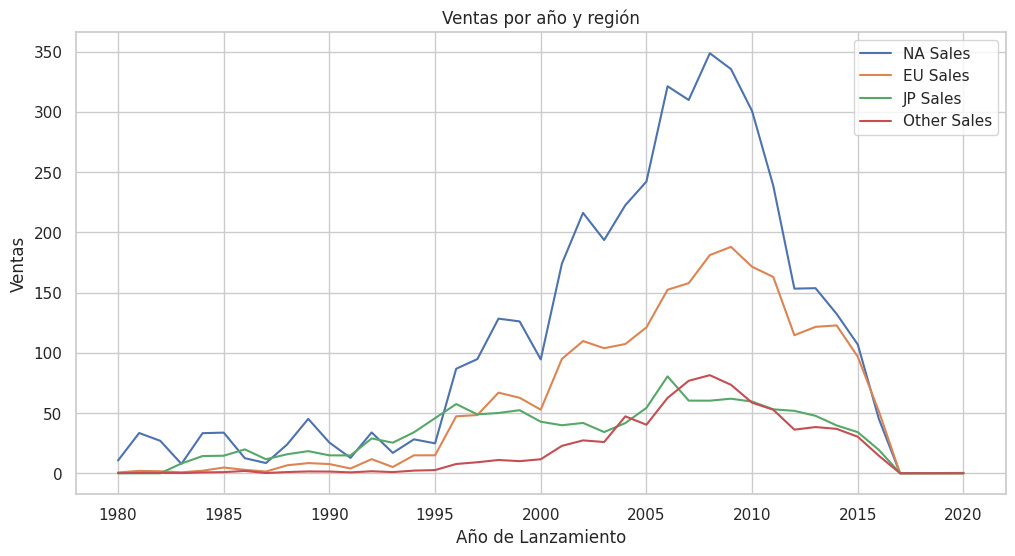

In [28]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")


sns.lineplot(data=sum_sales_region, x="Year_of_Release", y="NA_Sales", label="NA Sales")
sns.lineplot(data=sum_sales_region, x="Year_of_Release", y="EU_Sales", label="EU Sales")
sns.lineplot(data=sum_sales_region, x="Year_of_Release", y="JP_Sales", label="JP Sales")
sns.lineplot(data=sum_sales_region, x="Year_of_Release", y="Other_Sales", label="Other Sales")

plt.title("Ventas por año y región")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Ventas")

plt.show()

*Podemos observar como si bien las 4 regiones parecen cumplir un mismo patron, en donde la mayor cantidad de ventas se da entre el 2000 y el 2012, el volumen de ventas ha sido mayor en la región de Norte America y la Union Europea que en las otras dos en ese mismo periodo*

---

#3) Outliers


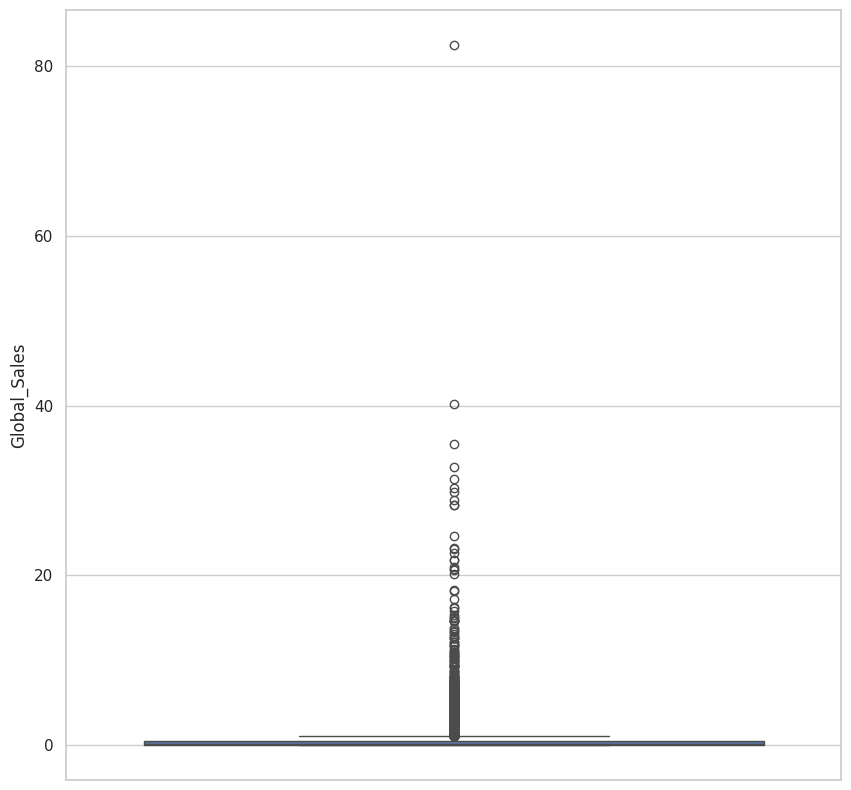

In [29]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_games['Global_Sales'])
plt.show()

Observamos una gran cantidad de valores outliers en nuestra variable a predecir. Crearemos dos funciones, una que calcule los limites superiores e inferiores del boxplot para determinar los valores outliers y otra que traiga los indices de dichos outlier para que los elimine.

In [30]:
# Quiero crear una función que calcule los limites del boxplot y me devuelva el limite superior e inferior en una variable con nombre ls
def outliers(data,feature):
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5

    ls = data.index[(data[feature]<lower_limit) | (data[feature]>upper_limit)]

    return ls

#Y otra función para que remueva los valores que estan por encima o por debajo de esos limites. Como parametros va a tomar el dataframe y el ls calculado anteriormente
def remove(df_games,ls):
    ls = sorted(set(ls))
    df_games = df_games.drop(ls)
    return df_games


In [31]:
#obtención de outliers
index_list_global = []
index_list_global.extend(outliers(df_games,'Global_Sales'))


In [32]:
#Borramos dichos outliers y los asigno a una nueva variable que va a almacenar nuestro dataset limpio
df_games_clean = remove(df_games,index_list_global)

In [33]:
df_games_clean.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,14827.000000,14827.000000,14827.000000,14827.000000,14827.000000,14827.000000,14827.000000,14827.000000,14827.000000,14827.000000
mean,2006.705267,0.114808,0.055591,0.039844,0.018732,0.229264,68.081189,24.986189,5.849268,135.419151
std,5.583817,0.152142,0.095347,0.102089,0.034789,0.241307,9.295449,11.172490,2.750425,253.192063
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2004.000000,0.000000,0.000000,0.000000,0.000000,0.050000,68.967679,21.000000,6.000000,26.000000
50%,2007.000000,0.060000,0.020000,0.000000,0.010000,0.140000,68.967679,26.360821,6.900000,162.229908
75%,2010.000000,0.160000,0.070000,0.030000,0.020000,0.320000,68.967679,26.360821,7.100000,162.229908
max,2020.000000,1.030000,0.980000,1.050000,0.740000,1.080000,98.000000,106.000000,9.700000,10665.000000


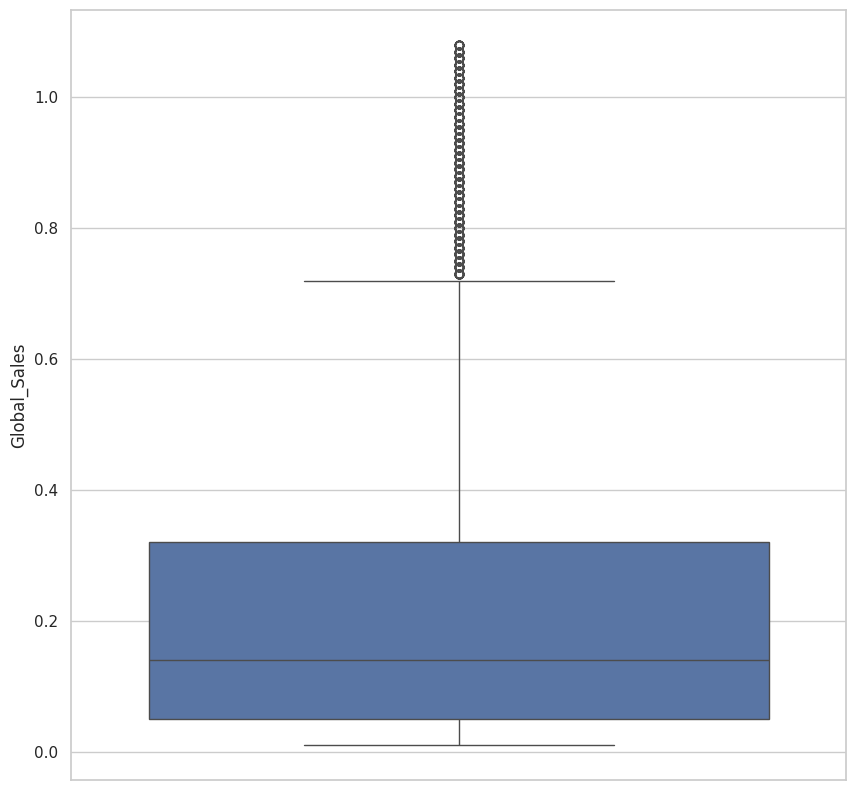

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(df_games_clean['Global_Sales'])
plt.show()

In [35]:
#Creo una copia para una futura exploración
df_games_2_clean = df_games_clean.copy()

df_games_2_clean

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1892,NASCAR Thunder 2004,PS2,2003,Racing,Electronic Arts,0.53,0.41,0.00,0.14,1.08,88.000000,15.000000,8.9,77.000000,EA Tiburon,E
1893,SpongeBob SquarePants: Revenge of the Flying D...,PS2,2002,Platform,THQ,0.53,0.41,0.00,0.14,1.08,68.967679,26.360821,6.6,41.000000,Big Sky Software,E
1894,Imagine: Babysitters,DS,2008,Simulation,Ubisoft,0.63,0.35,0.00,0.10,1.08,68.967679,26.360821,0.0,162.229908,Visual Impact,E
1895,Namco Museum Battle Collection,PSP,2005,Misc,Sony Computer Entertainment,0.75,0.18,0.00,0.16,1.08,73.000000,28.000000,7.2,9.000000,TOSE,E10+
1896,Fisherman's Bass Club,PS2,2002,Sports,Agetec,0.53,0.41,0.00,0.14,1.08,68.967679,26.360821,0.0,162.229908,Vingt-et-un Systems,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,6.9,162.229908,Otro,Otro
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,68.967679,26.360821,6.9,162.229908,Otro,Otro
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,6.9,162.229908,Otro,Otro
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,68.967679,26.360821,6.9,162.229908,Otro,Otro


Podemos observar la eliminación de los valores atipicos y como se muestra mejor nuestro gráfico

-----


Como aproximación a nuestro modelo, vamos a dropear las columnas *[Na_Sales]*, *[Eu_Sales]*, *[JP_Sales], *[Other_Sales]* y quedarnos con las que van a participar en nuestros algoritmos de regresión

In [36]:
df_games_clean.drop(['NA_Sales','EU_Sales','JP_Sales', 'User_Score','Other_Sales'], axis='columns', inplace=True)

In [37]:
df_games_clean

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Count,Developer,Rating
1892,NASCAR Thunder 2004,PS2,2003,Racing,Electronic Arts,1.08,88.000000,15.000000,77.000000,EA Tiburon,E
1893,SpongeBob SquarePants: Revenge of the Flying D...,PS2,2002,Platform,THQ,1.08,68.967679,26.360821,41.000000,Big Sky Software,E
1894,Imagine: Babysitters,DS,2008,Simulation,Ubisoft,1.08,68.967679,26.360821,162.229908,Visual Impact,E
1895,Namco Museum Battle Collection,PSP,2005,Misc,Sony Computer Entertainment,1.08,73.000000,28.000000,9.000000,TOSE,E10+
1896,Fisherman's Bass Club,PS2,2002,Sports,Agetec,1.08,68.967679,26.360821,162.229908,Vingt-et-un Systems,E
...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.01,68.967679,26.360821,162.229908,Otro,Otro
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.01,68.967679,26.360821,162.229908,Otro,Otro
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.01,68.967679,26.360821,162.229908,Otro,Otro
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,68.967679,26.360821,162.229908,Otro,Otro


Las columnas **['Platform','Genre','Name','Developer','Publisher','Rating']**.
*Se encuentran con valores categorícos. Vamos a utilizar LabelEnconder para codificar cada uno de estos valores.*

In [38]:
#En una variable llamada column, asigno las columnas que voy a pasar por el encoder
column=['Platform','Genre','Name','Developer','Publisher','Rating']


#Aplico el Label Encoder a cada una de las columnas guardadas en la variable 'column' anterior
df_games_clean[column]=df_games_clean[column].apply(LabelEncoder().fit_transform)

In [39]:
df_games_clean

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Count,Developer,Rating
1892,5897,16,2003,6,137,1.08,88.000000,15.000000,77.000000,438,0
1893,8363,16,2002,4,487,1.08,68.967679,26.360821,41.000000,185,0
1894,4018,4,2008,9,523,1.08,68.967679,26.360821,162.229908,1551,0
1895,6114,19,2005,3,454,1.08,73.000000,28.000000,9.000000,1378,1
1896,3033,16,2002,10,27,1.08,68.967679,26.360821,162.229908,1542,0
...,...,...,...,...,...,...,...,...,...,...,...
16714,7711,17,2016,0,499,0.01,68.967679,26.360821,162.229908,1034,5
16715,4786,28,2006,10,89,0.01,68.967679,26.360821,162.229908,1034,5
16716,3609,20,2016,1,230,0.01,68.967679,26.360821,162.229908,1034,5
16717,8346,6,2003,4,543,0.01,68.967679,26.360821,162.229908,1034,5


#4) Probando Modelos

##4.1Regresion Lineal

In [40]:
#Seleciono mis variables
X = df_games_clean.drop(['Global_Sales'],axis=1)
y = df_games_clean['Global_Sales']

In [41]:
#Muestro X
X

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Count,Developer,Rating
1892,5897,16,2003,6,137,88.000000,15.000000,77.000000,438,0
1893,8363,16,2002,4,487,68.967679,26.360821,41.000000,185,0
1894,4018,4,2008,9,523,68.967679,26.360821,162.229908,1551,0
1895,6114,19,2005,3,454,73.000000,28.000000,9.000000,1378,1
1896,3033,16,2002,10,27,68.967679,26.360821,162.229908,1542,0
...,...,...,...,...,...,...,...,...,...,...
16714,7711,17,2016,0,499,68.967679,26.360821,162.229908,1034,5
16715,4786,28,2006,10,89,68.967679,26.360821,162.229908,1034,5
16716,3609,20,2016,1,230,68.967679,26.360821,162.229908,1034,5
16717,8346,6,2003,4,543,68.967679,26.360821,162.229908,1034,5


In [42]:
y

,Global_Sales
1892,1.08
1893,1.08
1894,1.08
1895,1.08
1896,1.08
...,...
16714,0.01
16715,0.01
16716,0.01
16717,0.01


In [43]:
#Separo los datos de entrenamiento y test 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

print('x_train size',X_train.shape)
print('y_train size',y_train.shape)
print('x_test size',X_test.shape)
print('y_test size',y_test.shape)

x_train size (10378, 10)
y_train size (10378,)
x_test size (4449, 10)
y_test size (4449,)


In [44]:
#Escalo los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# prediccion
y_pred = model.predict(X_test)

In [48]:
# metrica R2
r2_rl = r2_score(y_test, y_pred)
r2_rl

0.10260671756716333

*Esta metrica nos permite entender que la eficacia en la prediccion de nuestro modelo utilizando un metodo de regresión lineal es del 10%*

##4.2 KNN

In [49]:
# Instancio modelo KNN
model = KNN(n_neighbors=10,weights="uniform",metric="manhattan")

In [50]:
# Entreno el modelo
model.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=10)

In [51]:
# Predigo KNN
y_pred = model.predict(X_test)

In [52]:
# Metrica R2 predicción
r2_knn = r2_score(y_test, y_pred)
r2_knn

0.23027966898544694

*Esta metrica nos permite entender que la eficacia en la prediccion de nuestro modelo utilizando un algoritmo de tipo KNN es del 23%*

## 4.3 XGB Boost / XGBRegressor

In [53]:
#Instancio modelo XGBRegresor
model = XGBRegressor(n_estimators= 2000 , max_depth= 8, learning_rate = 0.01)

In [54]:
#Entreno el modelo
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
#Predigo XGBRegresor
y_pred = model.predict(X_test)

In [56]:
#Metrica R2 predicción
r2_xgb = r2_score(y_test, y_pred)
r2_xgb

0.38249224171468765

In [57]:
#Metrica MAE predicción
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.13300263691805198


In [58]:
#Metrica MSE predicción
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.03573134457705522


*Esta metrica nos permite entender que la eficacia en la prediccion de nuestro modelo utilizando un modelo XGBRegresor es del 38%*


-----

Bajo el experimento anterior y utilizando estos 3 modelos de regresión para predecir las ventas globales de videojuegos podriamos decir que el mas efectivo es el XGBregresor con un 38% de efectividad.

El mismo 38% es muy bajo para decir que nuestro modelo obtuvo los resultados esperados.

Con esto podríamos decir, con los datos utilizados, ninguno de los modelos se acerca a un 60% - 65% esperado de predicción y necesitaríamos mas datos para poder mejorar la exactitud de la predicción. Además, sumado a esto nuestro MAE y MSE que tomamos para determinar que tan lejos estan nuestras predicciones de nuestro valores reales es de 0,13 y 0,035 respectivamente, siendo valores bastante altos que condice con la pobre efectividad del modelo

En el siguiente paso vamos a sumar la columna *[Other_Sales]*, que representa el menor porcentaje de ventas de todas las regiones.
La idea es, sumando esta columna poder ver si con un muy bajo % de ventas, logramos predecir, como serán las ventas en las otras regiones (Norte America, Europa, Japón) y asi llegar a las ventas globales (Global_Sales)


----


#Hipotesis 2.

##Si sumo a mis datos anteriores una columna que traiga el menor % de ventas ¿Puedo predecir como se va a comportar en el resto de las regiones?

In [59]:
#Tomo la copia que realizamos del df antes de dropear las columnas para el analisis
df_games_2_clean

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1892,NASCAR Thunder 2004,PS2,2003,Racing,Electronic Arts,0.53,0.41,0.00,0.14,1.08,88.000000,15.000000,8.9,77.000000,EA Tiburon,E
1893,SpongeBob SquarePants: Revenge of the Flying D...,PS2,2002,Platform,THQ,0.53,0.41,0.00,0.14,1.08,68.967679,26.360821,6.6,41.000000,Big Sky Software,E
1894,Imagine: Babysitters,DS,2008,Simulation,Ubisoft,0.63,0.35,0.00,0.10,1.08,68.967679,26.360821,0.0,162.229908,Visual Impact,E
1895,Namco Museum Battle Collection,PSP,2005,Misc,Sony Computer Entertainment,0.75,0.18,0.00,0.16,1.08,73.000000,28.000000,7.2,9.000000,TOSE,E10+
1896,Fisherman's Bass Club,PS2,2002,Sports,Agetec,0.53,0.41,0.00,0.14,1.08,68.967679,26.360821,0.0,162.229908,Vingt-et-un Systems,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,6.9,162.229908,Otro,Otro
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,68.967679,26.360821,6.9,162.229908,Otro,Otro
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,6.9,162.229908,Otro,Otro
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,68.967679,26.360821,6.9,162.229908,Otro,Otro


In [60]:
df_games_2_clean.drop(['NA_Sales','EU_Sales','JP_Sales', 'User_Score'], axis='columns', inplace=True)

In [61]:
#En una variable llamada column, asigno las columnas que voy a pasar por el encoder
column_2=['Platform','Genre','Name','Developer','Publisher','Rating']


#Aplico el Label Encoder a cada una de las columnas guardadas en la variable 'column anteriormente
df_games_2_clean[column_2]=df_games_2_clean[column_2].apply(LabelEncoder().fit_transform)

In [62]:
df_games_2_clean

,Name,Platform,Year_of_Release,Genre,Publisher,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Developer,Rating
1892,5897,16,2003,6,137,0.14,1.08,88.000000,15.000000,77.000000,438,0
1893,8363,16,2002,4,487,0.14,1.08,68.967679,26.360821,41.000000,185,0
1894,4018,4,2008,9,523,0.10,1.08,68.967679,26.360821,162.229908,1551,0
1895,6114,19,2005,3,454,0.16,1.08,73.000000,28.000000,9.000000,1378,1
1896,3033,16,2002,10,27,0.14,1.08,68.967679,26.360821,162.229908,1542,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16714,7711,17,2016,0,499,0.00,0.01,68.967679,26.360821,162.229908,1034,5
16715,4786,28,2006,10,89,0.00,0.01,68.967679,26.360821,162.229908,1034,5
16716,3609,20,2016,1,230,0.00,0.01,68.967679,26.360821,162.229908,1034,5
16717,8346,6,2003,4,543,0.00,0.01,68.967679,26.360821,162.229908,1034,5


------

#5) Probando Modelos 2

##5.1) Regresion Lineal Segunda prueba

In [63]:
# seleccionar variables
X_2 = df_games_2_clean.drop(['Global_Sales'],axis=1)
y_2 = df_games_2_clean['Global_Sales']

In [64]:
X_2

,Name,Platform,Year_of_Release,Genre,Publisher,Other_Sales,Critic_Score,Critic_Count,User_Count,Developer,Rating
1892,5897,16,2003,6,137,0.14,88.000000,15.000000,77.000000,438,0
1893,8363,16,2002,4,487,0.14,68.967679,26.360821,41.000000,185,0
1894,4018,4,2008,9,523,0.10,68.967679,26.360821,162.229908,1551,0
1895,6114,19,2005,3,454,0.16,73.000000,28.000000,9.000000,1378,1
1896,3033,16,2002,10,27,0.14,68.967679,26.360821,162.229908,1542,0
...,...,...,...,...,...,...,...,...,...,...,...
16714,7711,17,2016,0,499,0.00,68.967679,26.360821,162.229908,1034,5
16715,4786,28,2006,10,89,0.00,68.967679,26.360821,162.229908,1034,5
16716,3609,20,2016,1,230,0.00,68.967679,26.360821,162.229908,1034,5
16717,8346,6,2003,4,543,0.00,68.967679,26.360821,162.229908,1034,5


In [65]:
y_2

,Global_Sales
1892,1.08
1893,1.08
1894,1.08
1895,1.08
1896,1.08
...,...
16714,0.01
16715,0.01
16716,0.01
16717,0.01


In [66]:
# Separo la data de entrenamiento y test 70/30
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.30, random_state=16)

print('x_train_2 size',X_train_2.shape)
print('y_train_2 size',y_train_2.shape)
print('x_test_2 size',X_test_2.shape)
print('y_test_2 size',y_test_2.shape)

x_train_2 size (10378, 11)
y_train_2 size (10378,)
x_test_2 size (4449, 11)
y_test_2 size (4449,)


In [67]:
#Escalo los datos
sc = StandardScaler()
X_train_2 = sc.fit_transform(X_train_2)
X_test_2 = sc.transform(X_test_2)

In [68]:
model_2_lr = LinearRegression()

In [69]:
model_2_lr.fit(X_train_2, y_train_2)

LinearRegression()

In [70]:
#Predigo
y_pred_2 = model_2_lr.predict(X_test_2)

In [71]:
#Metrica R2
r2_rl_2 = r2_score(y_test_2, y_pred_2)
r2_rl_2

0.5449235461010843

Para nuestras segunda hipotesis hemos obtenido un r2 de 0.54, 54% de efectividad para la predicción contra un 11% con los datos anteriores.

---------

##5.2) Segunda Prueba KNN

In [72]:
# Instancio modelo KNN
model_2_knn = KNN(n_neighbors=8,weights="uniform",metric="manhattan")

In [73]:
# Entreno el modelo
model_2_knn.fit(X_train_2, y_train_2)

KNeighborsRegressor(metric='manhattan', n_neighbors=8)

In [74]:
# Predigo KNN
y_pred_2 = model_2_knn.predict(X_test_2)

In [75]:
# metrica R2
r2_knn_2 = r2_score(y_test_2, y_pred_2)
r2_knn_2

0.6400547201378567

Para nuestras segunda hipotesis hemos obtenido un r2 de 0.64, 64% de efectividad para la predicción contra un 23% con nuestros datos anteriores en el mismo algoritmo KNN. Basicamente no hubo diferencia con este

---------

##5.3) Segunda Prueba XGBRegresor

In [76]:
#Instancio modelo XGBRegresor
model_2_xgb = XGBRegressor(n_estimators= 2000 , max_depth= 8, learning_rate = 0.01)

In [77]:
#Entreno el modelo
model_2_xgb.fit(X_train_2, y_train_2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [78]:
#Predigo XGBRegresor
y_pred_2 = model_2_xgb.predict(X_test_2)

In [79]:
#Metrica R2 predicción
r2_xgb_2 = r2_score(y_test_2, y_pred_2)
r2_xgb_2

0.8377876049277614

In [80]:
#Metrica MAE predicción
print("MAE",mean_absolute_error(y_test_2,y_pred_2))

MAE 0.0602415679306159


In [81]:
#Metrica MSE predicción
print("MSE",mean_squared_error(y_test_2,y_pred_2))


MSE 0.0093862253635323


Para nuestras segunda hipotesis hemos obtenido un r2 de 0.83, 83% de efectividad para la predicción contra un 38% con nuestros datos anteriores en el mismo algoritmo XGBRegressor. Aqui si econtramos una diferencia significativa en el porcentaje de predicción. Además de tener un MAE de 0,06 y un MSE de 0,009 que indica nuestras predicciones están muy cerca de los valores reales

-------

#6) PCA

- Aplicaremos para esta última hipotesis, PCA para poder ver si mejora la efectivdad de nuestras predicciones

In [82]:
df_games_3_clean = df_games_2_clean.copy()

df_games_3_clean

,Name,Platform,Year_of_Release,Genre,Publisher,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Developer,Rating
1892,5897,16,2003,6,137,0.14,1.08,88.000000,15.000000,77.000000,438,0
1893,8363,16,2002,4,487,0.14,1.08,68.967679,26.360821,41.000000,185,0
1894,4018,4,2008,9,523,0.10,1.08,68.967679,26.360821,162.229908,1551,0
1895,6114,19,2005,3,454,0.16,1.08,73.000000,28.000000,9.000000,1378,1
1896,3033,16,2002,10,27,0.14,1.08,68.967679,26.360821,162.229908,1542,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16714,7711,17,2016,0,499,0.00,0.01,68.967679,26.360821,162.229908,1034,5
16715,4786,28,2006,10,89,0.00,0.01,68.967679,26.360821,162.229908,1034,5
16716,3609,20,2016,1,230,0.00,0.01,68.967679,26.360821,162.229908,1034,5
16717,8346,6,2003,4,543,0.00,0.01,68.967679,26.360821,162.229908,1034,5


------

#6.1) Probando Modelos 3

## 6.2) Regresion Lineal Tercera prueba (PCA)

In [83]:
# seleccionar variables
X_3 = df_games_3_clean.drop(['Global_Sales'],axis=1)
y_3 = df_games_3_clean['Global_Sales']

In [84]:
X_3

,Name,Platform,Year_of_Release,Genre,Publisher,Other_Sales,Critic_Score,Critic_Count,User_Count,Developer,Rating
1892,5897,16,2003,6,137,0.14,88.000000,15.000000,77.000000,438,0
1893,8363,16,2002,4,487,0.14,68.967679,26.360821,41.000000,185,0
1894,4018,4,2008,9,523,0.10,68.967679,26.360821,162.229908,1551,0
1895,6114,19,2005,3,454,0.16,73.000000,28.000000,9.000000,1378,1
1896,3033,16,2002,10,27,0.14,68.967679,26.360821,162.229908,1542,0
...,...,...,...,...,...,...,...,...,...,...,...
16714,7711,17,2016,0,499,0.00,68.967679,26.360821,162.229908,1034,5
16715,4786,28,2006,10,89,0.00,68.967679,26.360821,162.229908,1034,5
16716,3609,20,2016,1,230,0.00,68.967679,26.360821,162.229908,1034,5
16717,8346,6,2003,4,543,0.00,68.967679,26.360821,162.229908,1034,5


In [85]:
y_3

,Global_Sales
1892,1.08
1893,1.08
1894,1.08
1895,1.08
1896,1.08
...,...
16714,0.01
16715,0.01
16716,0.01
16717,0.01


In [86]:
# Separo la data de entrenamiento y test 70/30
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.30, random_state=16)

print('x_train_3 size',X_train_3.shape)
print('y_train_3 size',y_train_3.shape)
print('x_test_3 size',X_test_3.shape)
print('y_test_3 size',y_test_3.shape)

x_train_3 size (10378, 11)
y_train_3 size (10378,)
x_test_3 size (4449, 11)
y_test_3 size (4449,)


In [87]:
#Escalo los datos
sc = StandardScaler()
X_train_3 = sc.fit_transform(X_train_3)
X_test_3 = sc.transform(X_test_3)

In [88]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_3 = pca.fit_transform(X_train_3)
X_test_3 = pca.transform(X_test_3)

In [89]:
# Explicación de la varianza de las componentes
varianza_explicada = pca.explained_variance_ratio_
varianza_explicada

array([0.15156212, 0.11542707, 0.11355041, 0.10217622, 0.09627367,
       0.08849107, 0.08088809, 0.07250522, 0.06998436, 0.0595608 ,
       0.04958099])

Nuestros datos parecen tener una varianza bastante pareja, casi 8 componenetes mantienen una varianza cercana al 10% y los ultimos 3 por debajo del 7%

Como proximo estableceremos un pca de 8 componentes para ver cuanto varia la predicción de nuestros 3 algoritmos

In [90]:
pca = PCA(n_components=8) # cantidad de componentes
X_train_3 = pca.fit_transform(X_train_3)
X_test_3 = pca.transform(X_test_3)

In [91]:
model_3_lr = LinearRegression()

In [92]:
model_3_lr.fit(X_train_3, y_train_3)

LinearRegression()

In [93]:
#Predigo
y_pred_3 = model_3_lr.predict(X_test_3)

In [94]:
#Metrica R2
r2_rl_3 = r2_score(y_test_3, y_pred_3)
r2_rl_3

0.543294406893178

##6.3) KNN Tercera Prueba

In [95]:
# Instancio modelo KNN
model_3_knn = KNN(n_neighbors=8,weights="uniform",metric="manhattan")

In [96]:
# Entreno el modelo
model_3_knn.fit(X_train_3, y_train_3)

KNeighborsRegressor(metric='manhattan', n_neighbors=8)

In [97]:
# Predigo KNN
y_pred_3 = model_3_knn.predict(X_test_3)

In [98]:
# metrica R2
r2_knn_3 = r2_score(y_test_3, y_pred_3)
r2_knn_3

0.6445604873744659

##6.4) XGBRegressor Tercera Prueba

In [108]:
#Instancio modelo XGBRegresor
model_3_xgb = XGBRegressor(n_estimators= 3000 , max_depth= 6, learning_rate = 0.01)

In [109]:
#Entreno el modelo
model_3_xgb.fit(X_train_3, y_train_3)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [110]:
#Predigo XGBRegresor
y_pred_3 = model_3_xgb.predict(X_test_3)

In [111]:
#Metrica R2 predicción
r2_xgb_3 = r2_score(y_test_3, y_pred_3)
r2_xgb_3

0.7026799554720213

#7) Busqueda de parametros óptimos


In [103]:
model_3_xgb = XGBRegressor()

In [104]:
X_train_3

array([[ 1.71298277,  0.51198448, -0.56916107, ...,  0.6765317 ,
        -0.0360763 , -0.52734651],
       [-1.26378732,  2.09134624,  0.13943963, ..., -1.08107361,
        -1.08646044, -0.53938052],
       [-0.28190614,  1.59691715,  0.18333688, ..., -2.00997961,
        -1.64556991,  0.06464453],
       ...,
       [ 2.41275048,  2.54757723,  1.13981099, ..., -1.10109632,
         1.46051601, -0.68451403],
       [-1.2250896 ,  0.24525958, -0.95057325, ...,  0.16198576,
         0.03649798,  0.68443787],
       [ 0.70423138, -0.22922073, -1.64761975, ...,  0.59486665,
        -0.45931489, -0.06283238]])

In [105]:
y_train_3

,Global_Sales
11982,0.07
9767,0.12
12197,0.07
15147,0.02
13637,0.04
...,...
2527,0.81
3237,0.62
2473,0.84
4061,0.49


In [106]:
#Parametros utilizados para el xgbregressor
params_grid = {
        'n_estimators': [2000, 2500, 3000],
        'max_depth': [6,7,8],
        'learning_rate':[0.01, 0.10, 0.1]
        }

In [112]:
#Prueba con halvingGridSearchCV
halving_cv = HalvingGridSearchCV(model_3_xgb, params_grid, scoring="r2", factor=3)
halving_cv.fit(X_train_3, y_train_3)

print("Mejores parametros", halving_cv.best_params_)
print("Mejor Score CV", halving_cv.best_score_)
print(f'Accuracy del modelo R2 = {round(r2_score(y_test_3, halving_cv.predict(X_test_3)), 2)}')

Mejores parametros {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 2000}
Mejor Score CV 0.6789626223414388
Accuracy del modelo R2 = 0.7


Utilizando HalvingGridSearchCV confirma que los hiperparametros utilizados en nuestra tercera prueba con el PCA incluido son los optimos en función del r2 obtenido.

#Conclusión

En conclusión, se observó que el algoritmo XGBRegressor demostró un desempeño superior en ambas hipótesis, alcanzando la mejor métrica de R2. En la primera hipótesis, donde no se disponía de ningún dato sobre las ventas, la capacidad de predicción de las ventas globales fue limitada, con una efectividad del 38%. En contraste, en la segunda hipótesis, al incorporar los datos de ventas en otras regiones, aunque representaban un porcentaje reducido del total, la capacidad predictiva mejoró significativamente, alcanzando un 85% con un MSE de 0.0090 y un MAE de 0.06.

Cuando se utilizo PCA para reducir la dimensionalidad de nuestro conjunto de datos, utilizando 8 componentes la eficacia de nuestro algoritmo de regresión se mantuvo al 54%, pero las de nuestros algoritmo de KNN y XGBRegressor cayeron en sus predicciones aunque se mantuvieron más altas que las primeras pruebas. Por esto se decide quedarse con los resultados expresados sin la utilización de PCA.

Estos resultados sugieren que, en la primera hipótesis, la falta de datos limitó la precisión de las predicciones de ventas globales, destacando la necesidad de obtener más información para mejorar la exactitud del modelo. Por otro lado, en la segunda hipótesis, se evidenció que incluso con un porcentaje bajo de ventas en una región, fue posible predecir con un alto grado de certeza (85%) el comportamiento de las ventas en globales.